# Linear Regression

In this learning unit, we will dive into linear regression, one of the most commonly used techniques for regression tasks.

It is assumed that you have read the previous learning units on regression and that you have a working understanding of Python and the Numpy library, which are covered in previous learning units as well.

## Practical example

Let's say that we are a real estate agent and we would like to know for how much we could try to sell a house, based on some specifications about it. We have access to a large database containing information about houses such as the number of bedrooms, whether they have a garage, the square footage, and so on. We also have access to how much these houses were sold for. Surely we can make use of this information to make better guesses than by solely relying on our gut feeling.

If you had to write down a rule of thumb to estimate the price of a house if you were given some information about it, what would that rule be?

You could of course guess the same price regardless of the house, but surely, a shack in the middle of the woods will cost less than a mansion in Beverly Hills. So there must be a better way!

From experience, you might have realized that bigger houses generally sell for more. The more bedrooms, special features like a garden, a garage, etc. usually tend to influence the prize of the house. So how could you use this logic and transpose that as a rule that you can follow mechanically?

You could define how much each bedroom costs, or how much having a garage will hike up the price of the house. That way, you simply have to look at your features, calculate how much each of these will cost, and add them all together. Of course, there might be a minimum price for which every house will go for.

In code, it could look like this

In [1]:
# Define costs

minimum_cost = 80000
bedroom_cost = 25000
garage_cost = 10000
square_foot_price = 100

def price(n_bedrooms, n_garages, square_footage):
    """ returns the price of a house in dollars """
    
    return minimum_cost + bedroom_cost * n_bedrooms + garage_cost * n_garages + square_foot_price * square_footage

Now, we can estimate the price of houses!

In [113]:
price(n_bedrooms=3, n_garages = 1, square_footage = 1000)

265000

Of course, in this example, we just gave you the cost of each feature, but what if you did not know them beforehand? How could you find costs that will give you good estimates for house prices?

This is what linear regression tries to accomplish. It automatically finds the proper _costs_ such that if you add them all together, you will make the best guess about the price of the house.

## What does the model look like?

One of the most important part of machine learning is to understand what the model is, what's under the hood.

A linear regression model will be defined by a collection of weights or coefficients related to features, such that, if given features, we can compute an estimate the following way:

```python
def predict(features):
    return coefficients.dot(features)
```

The model can be represented by its coefficients, meaning that the size of the model is proportional to the number of features, not the size of the training data.

### The offset

To be complete, it is important to add an offset to the features. This allows the model to account for some value like the minimum price of the house as we described in the previous section. The offset will simply be a "dummy" feature that will always equal 1.

## How does the model learn?

Of course, what we will want to do is train our model such that it automatically finds the best coefficients.

As explained in the learning unit about regression, a better model is traditionally the one that minizes the mean-squared error. Therefore, we could sample random coefficients and then pick the ones that optimize this criterion. In theory, if we sample enough coefficients, we should be able to eventually find the best ones. Obviously, in practice, this does not work. As there is an infinite number of possible coefficients, we cannot sample them all, and therefore we might miss out on the best coefficients and be stuck with suboptimal ones.

So how can we be smarter?

Let's take an example with one feature `x` and a target variable `y`. Obviously, the same principles apply to cases with more features.

> It is also important to note that linear regression only works with numerical features, meaning that categorical features would have to be transformed into numerical features.

> Linear regression cannot handle missing values, and therefore, either data points with missing values should be omitted, or inputation should be performed.

> See the learning unit about preprocessing for more information

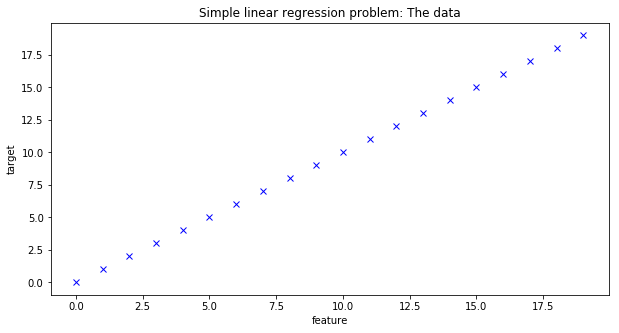

In [2]:
import numpy as np

# Create the data

n_samples = 20

x = np.arange(n_samples)
y = np.arange(n_samples)

# Plotting the data

import matplotlib.pyplot as plt

plt.figure(1,figsize=(10,5))
plt.title("Simple linear regression problem: The data")
plt.xlabel("feature")
plt.ylabel("target")

plt.plot(x,y,'bx')

plt.show()


Obviously, you can clearly see that all of these points sit on the line `y = x` with offset = 0. But how can the computer see it?

Let's say that the model first starts with a random guess about the coefficients.

coefficients = [ 0.73699517  0.05088406]


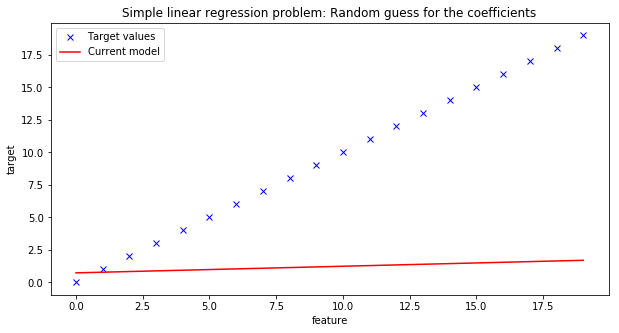

In [115]:
# Initialize the coefficients with random values

coefficients = np.random.rand(2)
print("coefficients =",coefficients)

def predict(coefficients):
    """ Function computing the output of the model based on coefficients """
    return coefficients[0] + coefficients[1] * x

# Plot the target variable as well as the output of the model

plt.figure(1,figsize=(10,5))
plt.title("Simple linear regression problem: Random guess for the coefficients")
plt.xlabel("feature")
plt.ylabel("target")

target, = plt.plot(x, y,'bx')
model, = plt.plot(x, predict(coefficients),'r')
plt.legend([target, model], ["Target values", "Current model"])

plt.show()

As a human, if you had to tell the computer how to improve, you would probably say something in the line of "your line should be steeper". This is something that the computer can do by adjusting the current coefficients of the model.

This raises two questions:
- How can the computer know whether to increase or decrease each coefficient?
- How much should the computer increase or decrease each coefficient?

The first problem is being solved by the computer as humans would. It will try increasing and decreasing each coefficient and see which direction helps by looking at which decreases the mean-squared error. Hopefully, if you brush off your calculus knowledge, you'll realize that we just described computing the derivative of the mean-squared error with respect to each coefficient!

In code, computing the mean-squared error with respect to the coefficients will look like this:

In [116]:
def MSE(coefficients):
    return np.mean((predict(coefficients)-y)**2)

print("Current MSE =", MSE(coefficients))

Current MSE = 98.5041803484


Thankfully, the mean-squared error is a function that has a derivative that can be derived analytically. Its derivative is defined as:

In [117]:
def derivative_MSE(coefficients):
    # Compute error
    
    error = predict(coefficients) - y
    
    # Adding the offset to the features
    
    features = np.array([[1, feature] for feature in x])

    return 0.5 * error.dot(features)/features.shape[0]

print("Current derivatives =", derivative_MSE(coefficients))

Current derivatives = [ -4.13980313 -55.10718225]


The sign of the derivative will tell us whether we need to increase or decrease each coefficient. Since we are trying to minimize the function, a negative derivative means that we have to increase the coefficient and vice versa.

This can be easily shown by actually increasing and decreasing each coefficient by a small value and then computing the mean-squared error. If the mean-squared error is smaller, it means that this direction is good.

In [118]:
epsilon = 0.1
coef = np.array([0.5,0.5])

# Current MSE
current = MSE(coef)
print("Current MSE =", current)

# Current derivative (negative values mean that the coefficients must be increased)
print("Current deratives = ", derivative_MSE(coef),"\n")

print("decrease of MSE by increasing coef[0] = ", current - MSE(np.array([coef[0] + epsilon, coef[1]])))
print("decrease of MSE by decreasing coef[0] = ", current - MSE(np.array([coef[0] - epsilon, coef[1]])))
print("decrease of MSE by increasing coef[1] = ", current - MSE(np.array([coef[0], coef[1] + epsilon])))
print("decrease of MSE by decreasing coef[1] = ", current - MSE(np.array([coef[0], coef[1] - epsilon])))

Current MSE = 26.375
Current deratives =  [ -2.125 -28.5  ] 

decrease of MSE by increasing coef[0] =  0.84
decrease of MSE by decreasing coef[0] =  -0.86
decrease of MSE by increasing coef[1] =  10.165
decrease of MSE by decreasing coef[1] =  -12.635


Now we need to answer the second question: "how much should we modify the current coefficients". Indeed, modifying them too much might backfire and modifying them too little might make the training very slow.

Thankfully, the derivatives do not only provide us with the direction in which we should modify our coefficients, but they also give us an indication of how _useful_ it is to modify them. Indeed, a derivative with a high absolute value will indicate that a large change in the function can be achieved by modifying the coefficient in that direction. Vice versa, a derivative close to zero indicates that little to no improvement will be achieved.

We can therefore use our derivatives as an indicator of how much we should modify each coefficient. In order to be even more in control, we will introduce a learning rate $\alpha$ which will scale these modifications. A higher learning-rate means that the modifications will be _harsher_, and vice versa.

Updating the coefficients will look like this:

In [119]:
def update_coefficients(coefficients, learning_rate):
    """ function updating coefficients based on their derivatives """
    
    derivatives = derivative_MSE(coefficients)
    return  coefficients - learning_rate*derivatives

def run_update(learning_rate):
    """ updates coefficients, prints information about the update and plot it """

    print("Current coefficients =", coefficients)
    print("Current MSE = ", MSE(coefficients))
    print("Current derivatives =", derivative_MSE(coefficients),"\n")

    new_coefficients = update_coefficients(coefficients,learning_rate)

    print("New coefficients =", new_coefficients)
    print("New MSE = ", MSE(new_coefficients))
    print("New derivatives =", derivative_MSE(new_coefficients),"\n")
    
    plt.figure(1,figsize=(10,5))
    plt.title("Simple linear regression problem: Updated")
    plt.xlabel("feature")
    plt.ylabel("target")

    target, = plt.plot(x, y,'bx')
    old, = plt.plot(x, predict(coefficients),'r')
    new, = plt.plot(x, predict(new_coefficients),'g')
    plt.legend([target, old, new], ['Target variable', 'Old coefficients', 'New coefficients'])
    
    plt.show()

First, let's see what happens when we pick a good learning rate.

Current coefficients = [ 0.73699517  0.05088406]
Current MSE =  98.5041803484
Current derivatives = [ -4.13980313 -55.10718225] 

New coefficients = [ 0.81979123  1.1530277 ]
New MSE =  5.94768089539
New derivatives = [  1.13677721  13.34346913] 



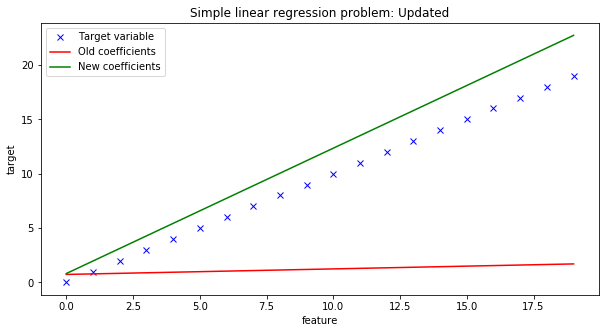

In [120]:
run_update(learning_rate=0.02)

As we can see, the model with the updated coefficients is closer to the target variable, and therefore has a smaller mean-squared error. We can also see that the derivatives themselves have decreased, indicating that we are getting _closer_ to finding the optimal coefficients.

Now let's see what happens when the learning rate is too high.

Current coefficients = [ 0.73699517  0.05088406]
Current MSE =  98.5041803484
Current derivatives = [ -4.13980313 -55.10718225] 

New coefficients = [ 1.15097548  5.56160228]
New MSE =  2670.89490215
New derivatives = [  22.24309859  287.14607461] 



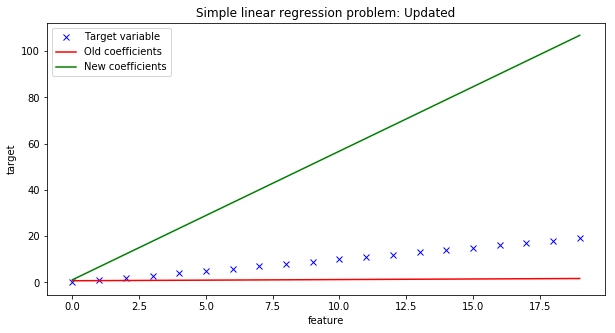

In [121]:
run_update(learning_rate=0.1)

As you can see, the line did move in the direction of the target variable, but went too far, which ended up being worse than before we did anything at all. You can also see that the derivatives are now even larger than before, meaning that if we performed another update, we would be even worse off than before.

Now, we'll see what happens when the learning rate happens to be too small.

Current coefficients = [ 0.73699517  0.05088406]
Current MSE =  98.5041803484
Current derivatives = [ -4.13980313 -55.10718225] 

New coefficients = [ 0.73720216  0.05363942]
New MSE =  97.894340939
New derivatives = [ -4.12661168 -54.93605562] 



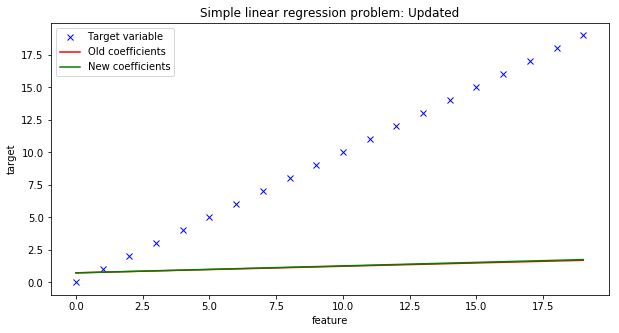

In [122]:
run_update(learning_rate=0.00005)

You can see that, whilst not being as bad as setting it too high, setting the learning rate too low will result in very slow updates, which in the worst case could lead to the training stopping early.

Now that we've shown how to update the coefficients once, we can keep on going! Indeed, we can update the coefficients until we reach a stopping criterion. This can be a certain number of update steps, a certain amount of time, or most commonly, whenever the MSE decreases by less than a factor _epsilon_. This method is most commonly known as gradient descent.

Doing the latter will look like this:

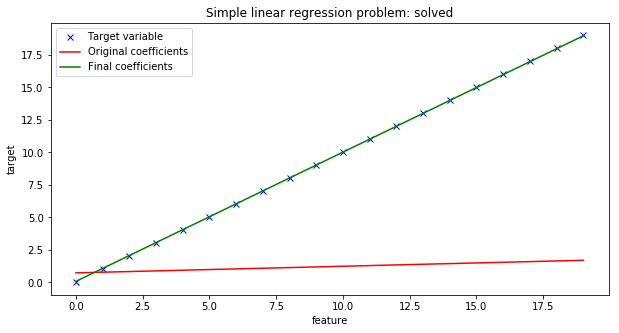

{'MSE': 0.0018672243019243102,
 'coefficients': array([ 0.08327854,  0.99358005])}

In [123]:
def find_best_coefficients(original_coefficients, learning_rate, epsilon):
    """ runs gradient descent to find the best coefficients """
    
    coef = original_coefficients.copy()
    
    old_MSE = float('inf')
    new_MSE = MSE(coef)
    
    # Loops until convergence
    while(old_MSE - new_MSE > epsilon):
        old_MSE = MSE(coef)
        
        # Update the coefficients
        coef -= learning_rate * derivative_MSE(coef)
        
        new_MSE = MSE(coef)
    
    # Plot the results
    plt.figure(1,figsize=(10,5))
    plt.title("Simple linear regression problem: solved")
    plt.xlabel("feature")
    plt.ylabel("target")
    
    target, = plt.plot(x, y,'bx')
    old, = plt.plot(x, predict(coefficients),'r')
    new, = plt.plot(x, predict(coef),'g')
    plt.legend([target, old, new], ['Target variable', 'Original coefficients', 'Final coefficients'])
    
    plt.show()
    return {"MSE":MSE(coef), "coefficients":coef}

find_best_coefficients(original_coefficients = coefficients, learning_rate = 0.002, epsilon = 0.000001)

As you can see, we managed to find weights that _almost_ fit our data perfectly. This may not always happen. Indeed, if the data contains noise, a linear model might not be able to represent the data perfectly. However, the technique that we described will still find the best line explaining the data.

Here is an example below.

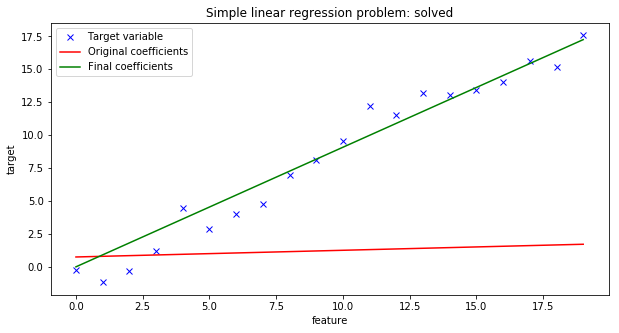

{'MSE': 1.4597078758808717, 'coefficients': array([-0.01164413,  0.90856963])}

In [124]:
noise_level = 0.5

# Add gaussian noise to the data
y = y + (2*np.random.normal(0,noise_level,len(y)) - 1)

original_coef = np.random.rand(2)

find_best_coefficients(original_coefficients = original_coef, learning_rate = 0.001, epsilon = 0.0001)

As you can see, the model is still a line, and it does go _through_ the points, and represent the desired trend well. The mean-squared error is obviously higher than in the previous model as we cannot reach zero, but it is still the best we can do with such a model.

## Summary

As we have shown above, training a linear regression model requires the following:

- **Defining a cost**

As most machine learning models, linear regression is minimizing a cost function. Traditionally, this function is the mean-squared error, but in theory, _any_ cost function is acceptable. Here are some potential alternatives:

> + One could use a weighted version of the mean-squared error in order to add more importance to certain data points.  

> + Errors could be mapped to concrete financial loss, which may be vary based on some business rule. Indeed, if the target is 10, it could perhaps be worse to predict 9 as opposed to 11.

> + Certain applications might care about the relative error as opposed to the absolute error.


It is important to note that in order to be certain to reach a global minimum using gradient descent, the cost function has to be convex. Indeed, convex functions only have one global minimum by definition, and therefore, we are guaranteed to find it.


- **Defining an optimization strategy**

Linear regression essentially boils down to an optimization problem. If the mean-squared error is used as a cost function, one could theoretically find the optimal coefficients analytically. Indeed, the entire problem could be posed as a large system of linear equations with the coefficients as unknowns.

So why did we choose to use gradient descent in our example? There are many practical reasons for this.

> - If the system gets too large, it might prove to be infeasible, or at least slower, to solve it analytically since it would require computing the inverse of a large matrix.

> - Some systems have an infinite number of solutions or not solution at all, which can be an issue.

> - In many applications, the model would have to be retrained often due to new data coming in. Solving the system analytically would essentially mean that we'd have to retrain the model from scratch every time, which could be impractical. Whereas gradient descent would _pick up where it left off_ and do a certain number of update steps until the cost function is again at the global minimum.

There exists many extensions of gradient descent such as coordinate descent or stochastic gradient descent to only name a few popular ones. These are explained in greater detail in the learning unit about gradient descent optimization. Though their inner mechanics, strengths, and weaknesses vary, they all still attempt to optimize functions, and therefore, can be used as the optimization strategy for linear regression.

- **Defining the learning rate and other hyperparameters**

As we showed in the example above, picking appropriate hyperparameters is crucial. Bad hyperparameters could make training the model slow, or worse, stop it from converging to an appropriate solution. There are no pre-defined _best_ value for hyperparameters, these always depend on the use case and the data. Therefore, finding the best hyperparameters is a trial and error effort.

- **Initializing coefficients**

At the beginning of the training phase, initial coefficients have to be set. Of course, certain initial conditions might be closer to the actual solution than others, but we cannot truly know this in advance. Therefore, coefficients are usually initialized with random values ranging from 0 to 1.

Usually, even if the coefficients are really far off from the solution, this does not slow down the training much. Therefore, not much effort is truly required there.

- **Running the training loop**

As we have shown in the example, after everything described above has been defined, we are ready to run the training loop to train our linear regression model. This loop updates the coefficients until convergence:

```
while (not converged):
    coefficients = coefficients - learning rate * gradient of cost function
```

## Improving Linear Regression

From now on, we will demonstrate certain phenomenon by using the code from the repository.

## Polynomial linear regression

As we explained above, linear regression can only model a linear function of the features, but sometimes, the relation between the features and the target is non-linear. Thankfully, there is a trick that allows us to model non-linear relationship, whilst not having to modify the way linear regression works.

To do so, one can create a polynomial of the features. For instance, if there is one input feature $x$, we could turn it into a polynomial by adding a new feature $x^2$, and so on. Similarly, if there are two input features $x_0$ and $x_1$, we can create a second degree polynomial by adding the following features: $x_{0}^{2}$, $x_{1}^{2}$, and $x_{0} x_{1}$.

By doing this, we will be able to fit functions like $f(x) = x^2$ for instance.

## Normalizing the features

As explained in the learning unit about preprocessing and the one about optimization, normalizing data can have huge benefits for a linear regression model. Indeed, after normalizing, the features are more comparable to each other, and therefore the coefficients should be more comparable as well. This has several benefits.

First of all, computers have higher precision when dealing with values closer to zero, and therefore, it will increase the accuracy and numerical stability of the calculations.

Second, having more comparable features help gradient descent to converge more efficiently. This is better shown with a visual example.

Let's take another simple example with two features.

In this example, the second feature is obviously behaving similarly to the first feature, but is scaled by a factor. We will now show how the cost function is decreasing, and how many iterations is takes, with and without normalizing the data.

## Regularization



#### Ridge
#### Lasso
#### ElasticNet

### Other optimization techniques (SGD, adding momentum)

## Pitfalls

### Missing values

### Cannot deal with categorical data (how to deal with it?)

## Putting it all together

In this section, we'll show how to write a Linear Regression class that includes all of the functionalities that we mentioned previously.